# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Observations
#By looking at the regression analysis of max temperature vs. latitude in the northern hemisphere; one can notice the temperature decreasing as the location moves farther away from the equator. 
#The humidity vs. latitude relationship in similar in both the southern and northern hemispheres
#In the northern hemisphere; the wind speed seems to increase when the locations move farther away from the equator. In the Southern hemisphere; the opposite happens.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
!pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

572

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
weatherdf = pd.DataFrame()
counter = 1 
for each in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q=" + each + "&appid=" + weather_api_key 
    print("Processing the city number: " + str(counter) + " and city name: " + each)
    counter += 1
    response = requests.get(url).json()
    if response["cod"] == 200:
        eachCity = {"City":each,
               "Humidity":response["main"]["humidity"],
               "Temperature":response["main"]["temp"],
               "Cloudiness":response["clouds"]["all"],
               'Wind Speed (mph)':response['wind']["speed"],
               "Longitude": response["coord"]["lon"],
               "Latitude": response["coord"]["lat"],
               "Country": response["sys"]["country"]}
        
        weatherdf = weatherdf.append(eachCity,ignore_index=True)
    else: 
        print("City not found")
weatherdf       

Processing the city number: 1 and city name: kapaa
Processing the city number: 2 and city name: albany
Processing the city number: 3 and city name: illoqqortoormiut
City not found
Processing the city number: 4 and city name: sayat
Processing the city number: 5 and city name: saldanha
Processing the city number: 6 and city name: chicama
Processing the city number: 7 and city name: kaitangata
Processing the city number: 8 and city name: mataura
Processing the city number: 9 and city name: huarmey
Processing the city number: 10 and city name: bluff
Processing the city number: 11 and city name: barcelos
Processing the city number: 12 and city name: san policarpo
Processing the city number: 13 and city name: hobart
Processing the city number: 14 and city name: ilulissat
Processing the city number: 15 and city name: butaritari
Processing the city number: 16 and city name: atuona
Processing the city number: 17 and city name: provideniya
Processing the city number: 18 and city name: aklavik
Pr

Processing the city number: 149 and city name: mormugao
Processing the city number: 150 and city name: tsiroanomandidy
Processing the city number: 151 and city name: husavik
Processing the city number: 152 and city name: sao filipe
Processing the city number: 153 and city name: jamestown
Processing the city number: 154 and city name: qaanaaq
Processing the city number: 155 and city name: champerico
Processing the city number: 156 and city name: kiliya
Processing the city number: 157 and city name: hurricane
Processing the city number: 158 and city name: hithadhoo
Processing the city number: 159 and city name: samusu
City not found
Processing the city number: 160 and city name: igarka
Processing the city number: 161 and city name: arraial do cabo
Processing the city number: 162 and city name: bolungarvik
City not found
Processing the city number: 163 and city name: linxia
Processing the city number: 164 and city name: dujuma
City not found
Processing the city number: 165 and city name: 

Processing the city number: 292 and city name: krasnoselkup
Processing the city number: 293 and city name: san leandro
Processing the city number: 294 and city name: oum hadjer
Processing the city number: 295 and city name: saint george
Processing the city number: 296 and city name: nyagan
Processing the city number: 297 and city name: mbekenyera
Processing the city number: 298 and city name: christchurch
Processing the city number: 299 and city name: tazovskiy
Processing the city number: 300 and city name: asgabat
Processing the city number: 301 and city name: yangambi
Processing the city number: 302 and city name: meadow lake
Processing the city number: 303 and city name: ilhabela
Processing the city number: 304 and city name: kutum
Processing the city number: 305 and city name: hami
Processing the city number: 306 and city name: labuan
Processing the city number: 307 and city name: vila velha
Processing the city number: 308 and city name: iqaluit
Processing the city number: 309 and 

Processing the city number: 436 and city name: sao gabriel da cachoeira
Processing the city number: 437 and city name: kuche
City not found
Processing the city number: 438 and city name: halifax
Processing the city number: 439 and city name: saint anthony
Processing the city number: 440 and city name: pangnirtung
Processing the city number: 441 and city name: okahandja
Processing the city number: 442 and city name: hailar
Processing the city number: 443 and city name: trat
Processing the city number: 444 and city name: balezino
Processing the city number: 445 and city name: moses lake
Processing the city number: 446 and city name: acaponeta
Processing the city number: 447 and city name: tarrafal
Processing the city number: 448 and city name: vila
Processing the city number: 449 and city name: trorod
Processing the city number: 450 and city name: sisimiut
Processing the city number: 451 and city name: hualmay
Processing the city number: 452 and city name: ust-tarka
Processing the city n

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,kapaa,20.0,US,66.0,22.08,-159.32,83.57,10.29
1,albany,97.0,US,91.0,42.60,-73.97,64.26,3.47
2,sayat,0.0,TM,32.0,38.78,63.88,68.00,4.70
3,saldanha,0.0,ZA,81.0,-33.01,17.94,50.00,1.12
4,chicama,32.0,PE,82.0,-7.84,-79.15,62.85,7.20
...,...,...,...,...,...,...,...,...
520,iquitos,40.0,PE,94.0,-3.75,-73.25,73.40,0.85
521,gimli,37.0,CA,46.0,50.63,-96.99,84.49,5.01
522,levokumskoye,1.0,RU,62.0,44.82,44.66,70.61,3.29
523,grants,1.0,US,10.0,35.15,-107.85,78.80,14.99


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherdf.to_csv("cities.csv",index=False)
weatherdf

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,kapaa,20.0,US,66.0,22.08,-159.32,83.57,10.29
1,albany,97.0,US,91.0,42.60,-73.97,64.26,3.47
2,sayat,0.0,TM,32.0,38.78,63.88,68.00,4.70
3,saldanha,0.0,ZA,81.0,-33.01,17.94,50.00,1.12
4,chicama,32.0,PE,82.0,-7.84,-79.15,62.85,7.20
...,...,...,...,...,...,...,...,...
520,iquitos,40.0,PE,94.0,-3.75,-73.25,73.40,0.85
521,gimli,37.0,CA,46.0,50.63,-96.99,84.49,5.01
522,levokumskoye,1.0,RU,62.0,44.82,44.66,70.61,3.29
523,grants,1.0,US,10.0,35.15,-107.85,78.80,14.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
is_humidity_100 = weatherdf['Humidity'] <= 100
clean_city_data = weatherdf[is_humidity_100]
clean_city_data

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,kapaa,20.0,US,66.0,22.08,-159.32,83.57,10.29
1,albany,97.0,US,91.0,42.60,-73.97,64.26,3.47
2,sayat,0.0,TM,32.0,38.78,63.88,68.00,4.70
3,saldanha,0.0,ZA,81.0,-33.01,17.94,50.00,1.12
4,chicama,32.0,PE,82.0,-7.84,-79.15,62.85,7.20
...,...,...,...,...,...,...,...,...
520,iquitos,40.0,PE,94.0,-3.75,-73.25,73.40,0.85
521,gimli,37.0,CA,46.0,50.63,-96.99,84.49,5.01
522,levokumskoye,1.0,RU,62.0,44.82,44.66,70.61,3.29
523,grants,1.0,US,10.0,35.15,-107.85,78.80,14.99


In [7]:
#  Get the indices of cities that have humidity over 100%.
weatherdf[~is_humidity_100]


,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)


In [8]:
# Export the City_Data into a csv
clean_city_data.to_csv("clean_cities.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

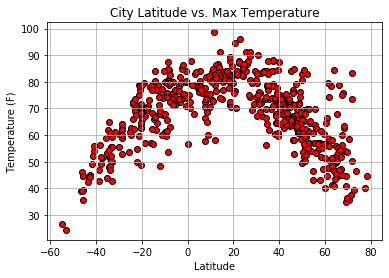

In [9]:
x = clean_city_data["Latitude"]
y = clean_city_data["Temperature"]
plt.scatter(x,y,marker="o",facecolors="r",edgecolors="black")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

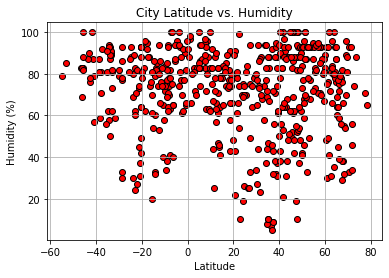

In [10]:
x = clean_city_data["Latitude"]
y = clean_city_data["Humidity"]
plt.scatter(x,y,marker="o",facecolors="r",edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

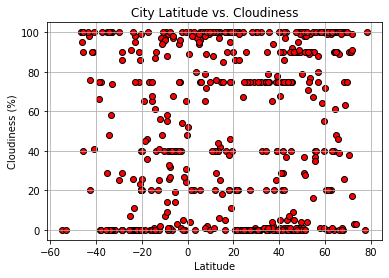

In [11]:
x = clean_city_data["Latitude"]
y = clean_city_data["Cloudiness"]
plt.scatter(x,y,marker="o",facecolors="r",edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

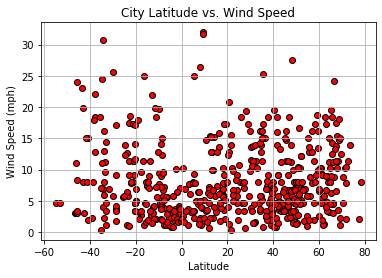

In [12]:
x = clean_city_data["Latitude"]
y = clean_city_data["Wind Speed (mph)"]
plt.scatter(x,y,marker="o",facecolors="r",edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_equation

# Define a fuction for annotating
def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b),fontsize=10,color="blue")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
southern_df = clean_city_data[clean_city_data["Longitude"] <=0]
southern_df

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,kapaa,20.0,US,66.0,22.08,-159.32,83.57,10.29
1,albany,97.0,US,91.0,42.60,-73.97,64.26,3.47
4,chicama,32.0,PE,82.0,-7.84,-79.15,62.85,7.20
7,huarmey,97.0,PE,84.0,-10.07,-78.15,61.14,7.67
9,barcelos,90.0,PT,100.0,41.54,-8.62,63.90,13.87
...,...,...,...,...,...,...,...,...
510,southbridge,86.0,US,97.0,42.08,-72.03,65.41,4.16
513,rimbey,90.0,CA,93.0,52.63,-114.24,55.18,8.05
520,iquitos,40.0,PE,94.0,-3.75,-73.25,73.40,0.85
521,gimli,37.0,CA,46.0,50.63,-96.99,84.49,5.01


In [15]:
northern_df = clean_city_data[clean_city_data["Latitude"] >=0]
northern_df

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature,Wind Speed (mph)
0,kapaa,20.0,US,66.0,22.08,-159.32,83.57,10.29
1,albany,97.0,US,91.0,42.60,-73.97,64.26,3.47
2,sayat,0.0,TM,32.0,38.78,63.88,68.00,4.70
9,barcelos,90.0,PT,100.0,41.54,-8.62,63.90,13.87
10,san policarpo,29.0,PH,66.0,12.18,125.51,85.05,7.14
...,...,...,...,...,...,...,...,...
518,tezu,100.0,IN,74.0,27.92,96.17,79.65,0.67
519,hohhot,29.0,CN,56.0,40.81,111.65,73.40,4.47
521,gimli,37.0,CA,46.0,50.63,-96.99,84.49,5.01
522,levokumskoye,1.0,RU,62.0,44.82,44.66,70.61,3.29


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.7


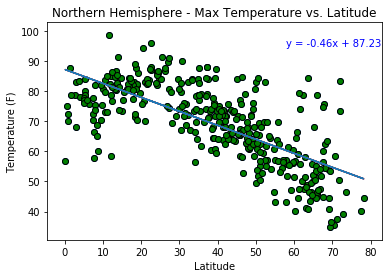

In [16]:
equation = linear_regression(northern_df["Latitude"], northern_df["Temperature"])
x = northern_df["Latitude"]
y = northern_df["Temperature"]
m, b = np.polyfit(x,y, 1)
annotate(equation, 58, 95)

# plot the scatter
plt.scatter(x, y, marker = "o", facecolors="g",edgecolors="black")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
#plot the line
plt.plot(x, (m*x+b))
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.01


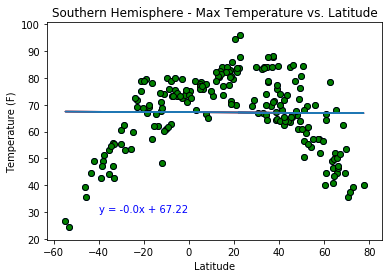

In [17]:
equation = linear_regression(southern_df["Latitude"], southern_df["Temperature"])
annotate(equation, -40, 30)

x = southern_df["Latitude"]
y = southern_df["Temperature"]
m, b = np.polyfit(x,y,1)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.scatter(x,y,marker="o",facecolors="g",edgecolors="black")
plt.plot(x, (m*x+b))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.04


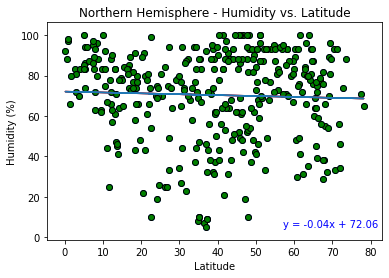

In [18]:
equation = linear_regression(northern_df["Latitude"], northern_df["Humidity"])
annotate(equation, 57, 5)
x = northern_df["Latitude"]
y = northern_df["Humidity"]
m, b = np.polyfit(x,y,1)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.scatter(x,y,marker="o",facecolors="g",edgecolors="black")
plt.plot(x, (m*x+b))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.2


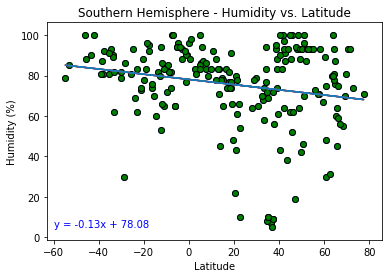

In [19]:
equation = linear_regression(southern_df["Latitude"], southern_df["Humidity"])
annotate(equation, -60,5)
x = southern_df["Latitude"]
y = southern_df["Humidity"]
m, b = np.polyfit(x,y,1)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.scatter(x,y,marker="o",facecolors="g",edgecolors="black")
plt.plot(x, (m*x+b))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.03


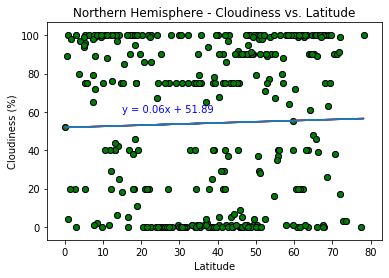

In [20]:
equation = linear_regression(northern_df["Latitude"], northern_df["Cloudiness"])
annotate(equation, 15, 60)
x = northern_df["Latitude"]
y = northern_df["Cloudiness"]
m, b = np.polyfit(x,y,1)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.scatter(x,y,marker="o",facecolors="g",edgecolors="black")
plt.plot(x, (m*x+b))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.0


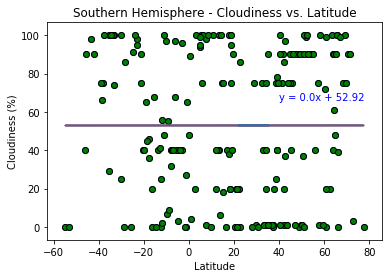

In [21]:
equation = linear_regression(southern_df["Latitude"], southern_df["Cloudiness"])
annotate(equation, 40, 66)
x = southern_df["Latitude"]
y = southern_df["Cloudiness"]
m, b = np.polyfit(x,y,1)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.scatter(x,y,marker="o",facecolors="g",edgecolors="black")
plt.plot(x, (m*x+b))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.09


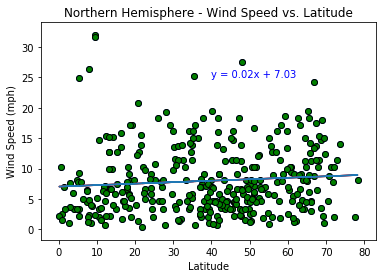

In [22]:
equation = linear_regression(northern_df["Latitude"], northern_df["Wind Speed (mph)"])
x = northern_df["Latitude"]
y = northern_df["Wind Speed (mph)"]
m, b = np.polyfit(x,y, 1)
annotate(equation, 40,25)

# plot the scatter
plt.scatter(x, y, marker = "o", facecolors="g",edgecolors="black")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plot the line
plt.plot(x, (m*x+b))
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


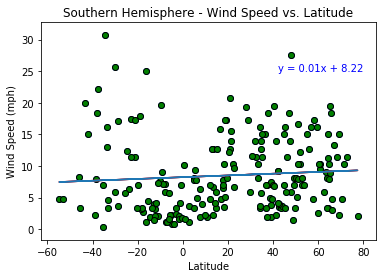

In [23]:
equation = linear_regression(southern_df["Latitude"], southern_df["Wind Speed (mph)"])
x = southern_df["Latitude"]
y = southern_df["Wind Speed (mph)"]
m, b = np.polyfit(x,y, 1)
annotate(equation, 42, 25)

# plot the scatter
plt.scatter(x, y, marker = "o", facecolors="g",edgecolors="black")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
#plot the line
plt.plot(x, (m*x+b))
plt.show()